In [7]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [8]:
BOX_COLOR = (255, 0, 0)  # Red
TEXT_COLOR = (255, 255, 255)  # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min +
                                                 w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max),
                  color=color,
                  thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name,
                                                     cv2.FONT_HERSHEY_SIMPLEX,
                                                     0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)),
                  (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [16]:
image = cv2.imread('sample.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

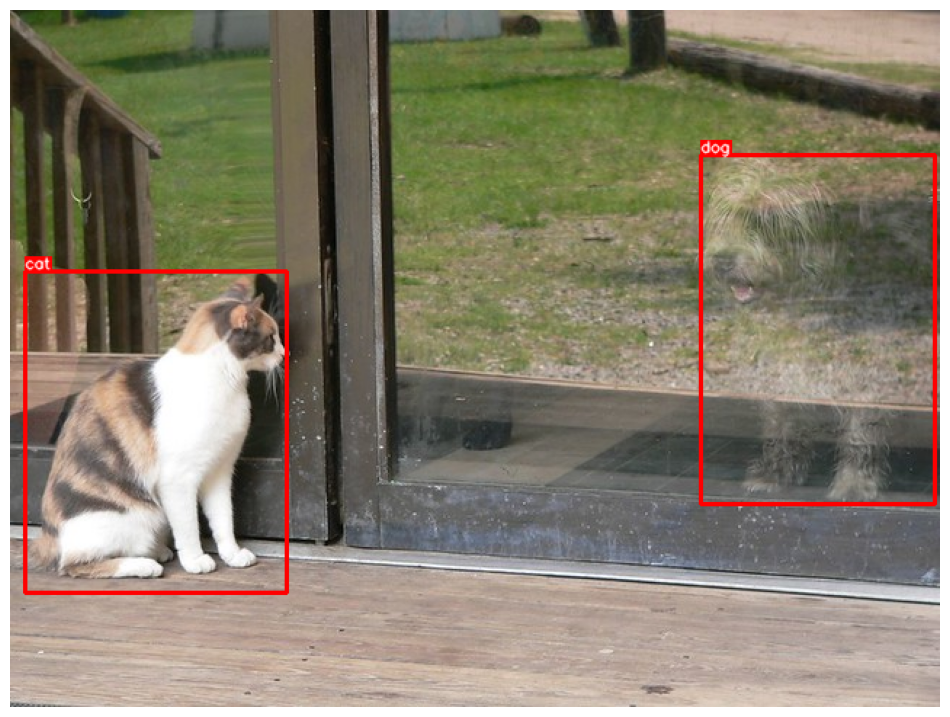

In [58]:
# [x_min, y_min, width, height]
bboxes = [[10.66, 180.95, 180.09, 220.8], [475.7, 100.84, 160.8, 240]]
category_ids = [17, 18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {17: 'cat', 18: 'dog'}
visualize(image, bboxes, category_ids, category_id_to_name)

In [59]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

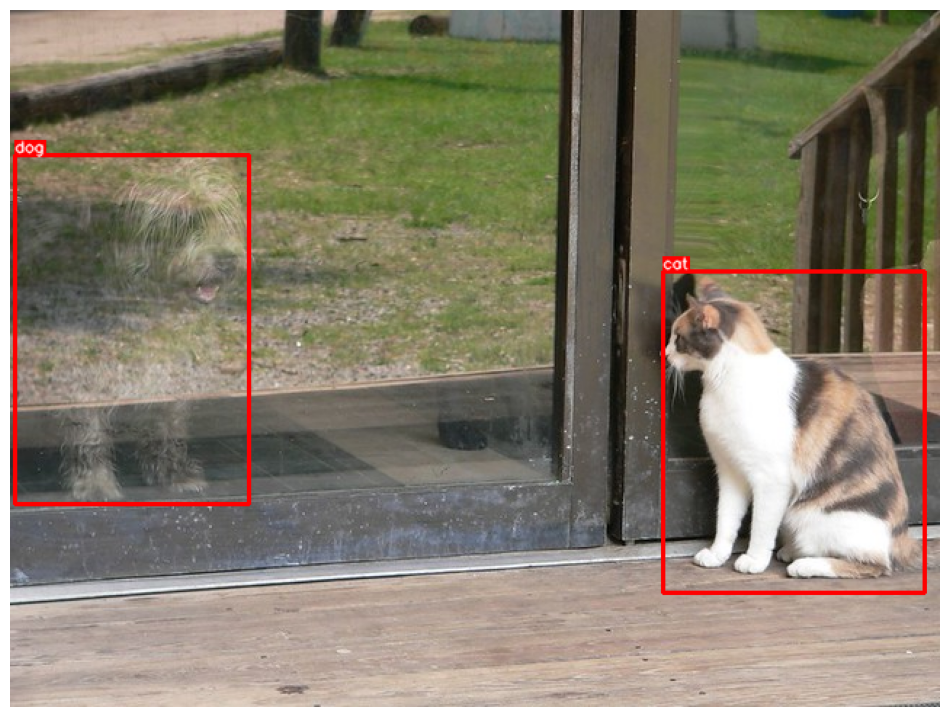

In [60]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [61]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

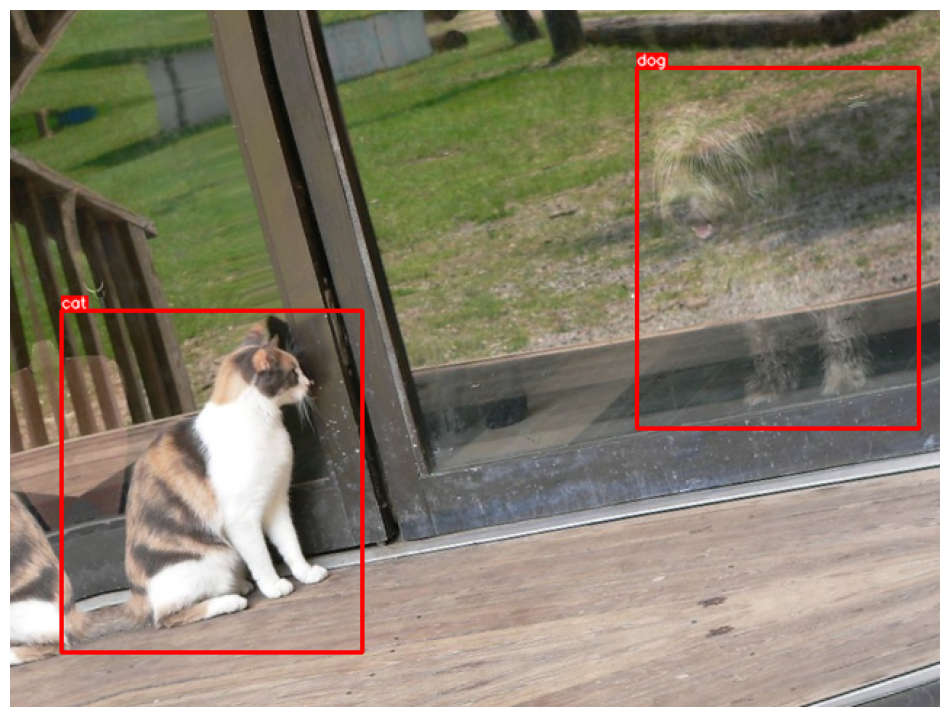

In [62]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [63]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

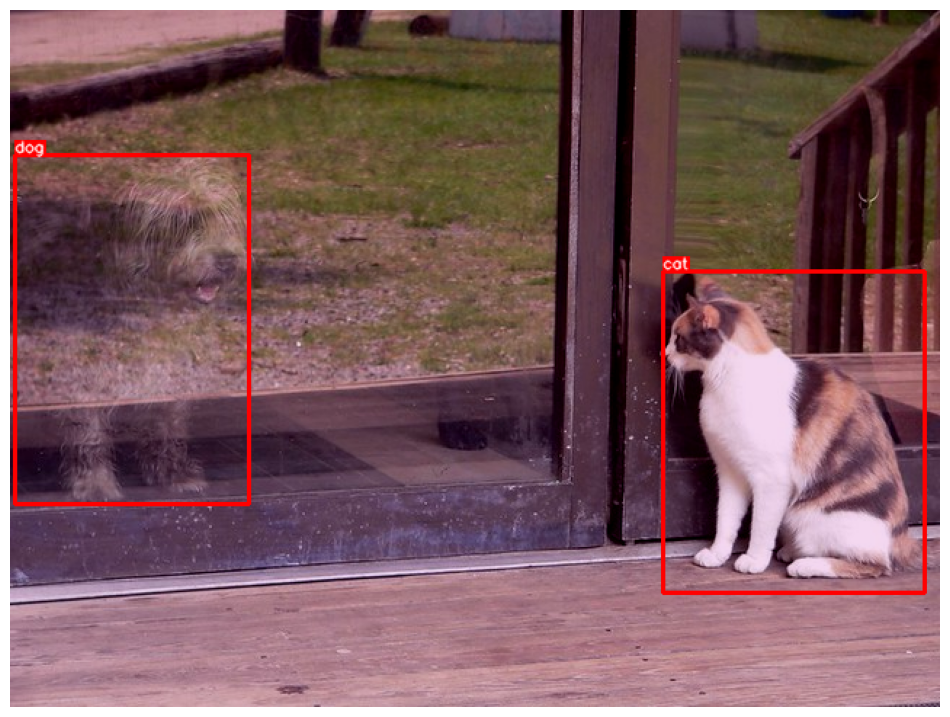

In [64]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [65]:
transform = A.Compose(
    [A.CenterCrop(height=280, width=280, p=1)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

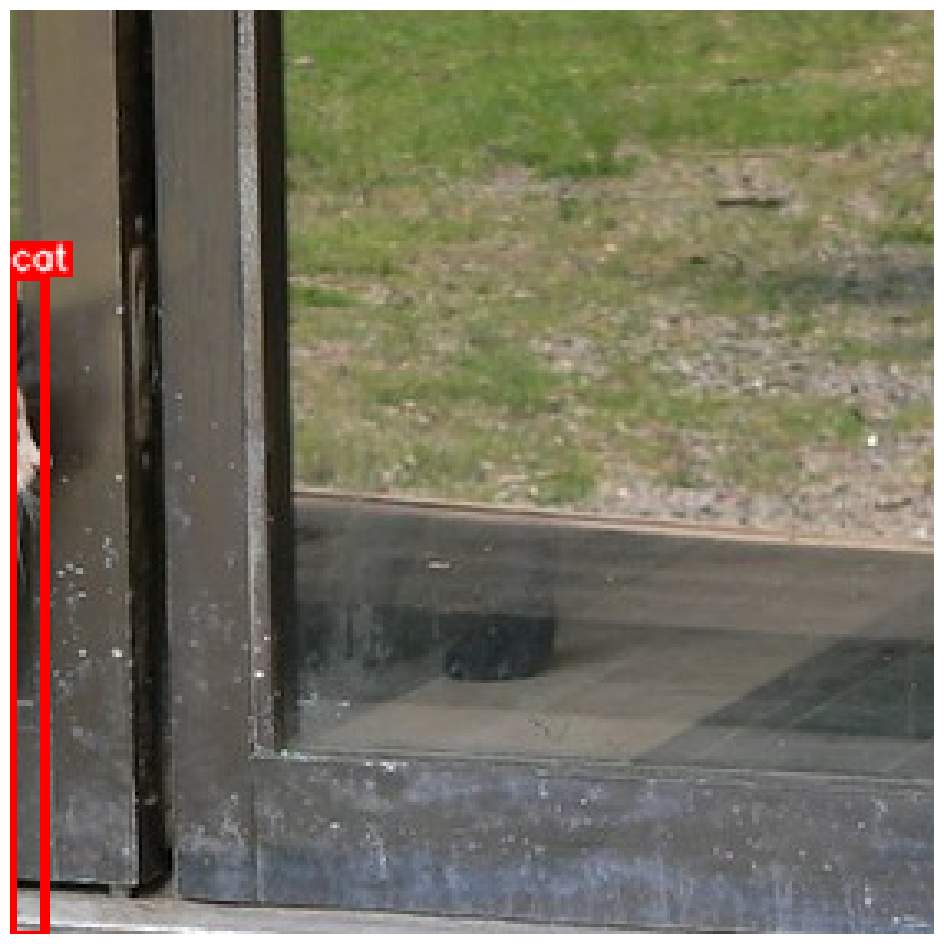

In [66]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [73]:
transform = A.Compose(
    [A.CenterCrop(height=400, width=400, p=1)],
    bbox_params=A.BboxParams(format='coco', min_area=4500, label_fields=['category_ids']),
)

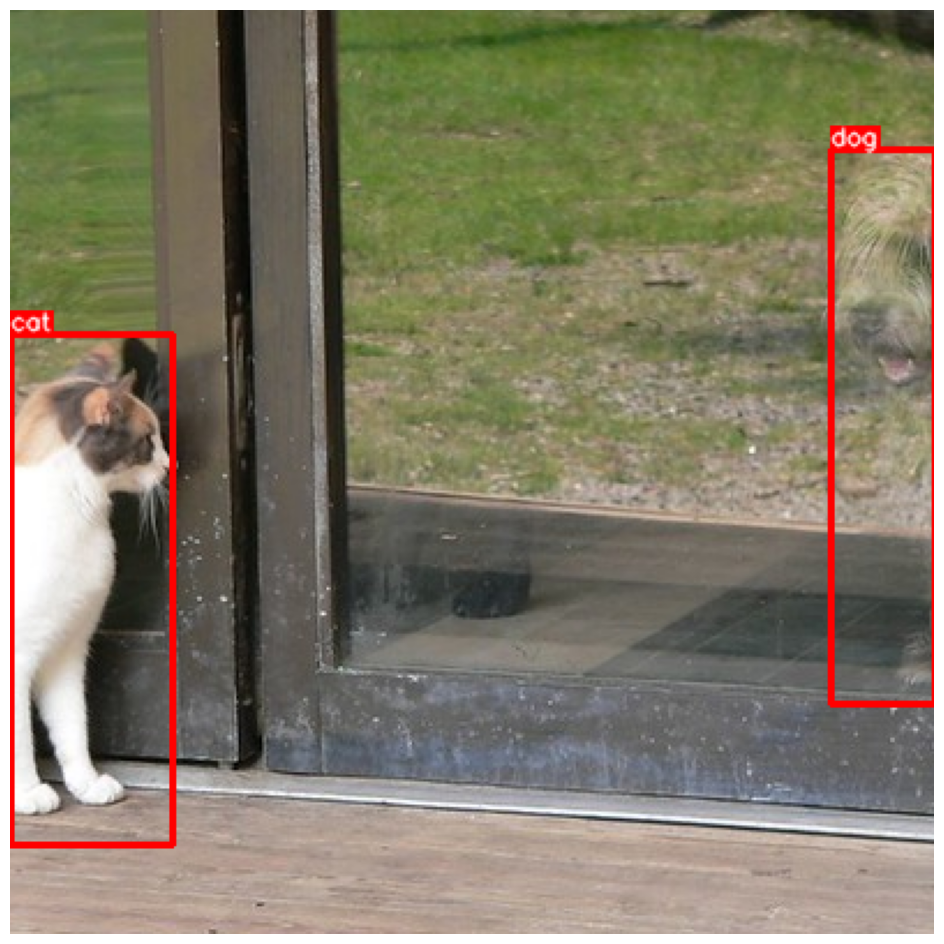

In [74]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [75]:
transform = A.Compose(
    [A.CenterCrop(height=280, width=280, p=1)],
    bbox_params=A.BboxParams(format='coco', min_visibility=0.3, label_fields=['category_ids']),
)

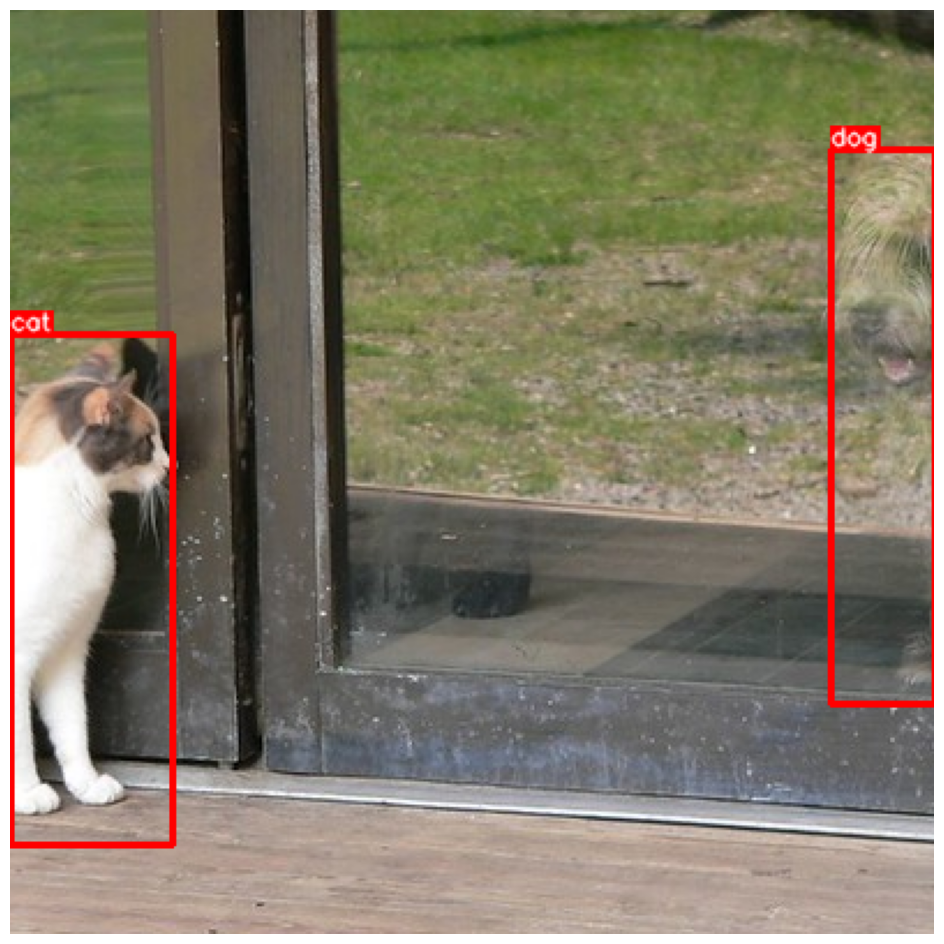

In [76]:
ransformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)